<div class="alert alert-block alert-success">
    
# Retail Data Cleaning – DigiCO Electronics Store
#### Created by: Robiatul Adawiyah Al-Qosh
#### Date: 27/10/2024
#### Environment: Python 3.10

Libraries used:
* os (for accessing files in the folder)
* pandas (for data manipulation)
* numpy (for numerical operations)
* seaborn (for data visualization)
* nltk (for natural language processing tasks)
* SentimentIntensityAnalyzer (from nltk, for sentiment analysis)
* matplotlib.pyplot (for plotting and visualizations)
* sklearn.linear_model.LinearRegression (for linear regression modeling)
* sklearn.model_selection.train_test_split (for splitting data into training and testing sets)
* sklearn.metrics.r2_score (for evaluating model performance)
* sklearn.preprocessing.StandardScaler (for feature scaling)


   
</div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. Importing Libraries and Setting Working Directory](#Import) <br>
[3. Data Cleansing Process](#clean) <br>
$\;\;\;\;$[3.1. Handling Dirty Data](#dirty) <br>
$\;\;\;\;$[3.2. Detecting and Removing Outliers](#outlier) <br>
$\;\;\;\;$[3.3. Imputing Missing Values](#missing) <br>
[4. Writing Output Files](#write) <br>
$\;\;\;\;$[4.1. Dirty Data Solution csv](#write-dirty) <br>
$\;\;\;\;$[4.2. Outlier Data Solution csv](#write-outlier) <br>
$\;\;\;\;$[4.3. Missing Data Solution csv](#write-missing) <br>
[5. Summary](#summary) <br>
[6. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>

</div>

The project of this assignment aimed at ensuring data quality and reliability in a retail dataset from DigiCO, an online electronics store in Melbourne. The task involves cleansing transactional data by correcting errors, imputing missing values, and identifying outliers. This cleaned dataset will form the foundation for accurate future analyses and support operational decision-making.

Challenges in this task include imputing missing values across various data types, managing seasonal variations in delivery charges, and accurately detecting outliers in key fields such as delivery charges. This work requires a structured approach to explore the data, detect and resolve inconsistencies, and apply advanced imputation and regression techniques to create a consistent dataset.

In [1758]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="alert alert-block alert-warning">

## 2.  Importing Libraries and Seeting Working Directory  <a class="anchor" name="Import"></a>

</div>

First of all, all the necessary libraries need to be imported.

In [1759]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Then, setting the working directory that contains important csv files.

In [ ]:
group_008 = "/robiatulaa/retail_data_cleaning"
# Plese adjust the path

<div class="alert alert-block alert-warning">

## 3.  Data Cleansing Process  <a class="anchor" name="clean"></a>

</div>

This part is the fundamental part in data cleansing process that have three different type of data cleansing, which are handling dirty data, imputing missing value, and detecting and removing outliers.

<div class="alert alert-block alert-info">
   
### 3.1. Handling Dirty Data <a class="anchor" name="dirty"></a>

</div>

Load the intended file form the working directory to get the dirty data.

In [ ]:
# Read dirty data csv file from working directory
dirty_data = pd.read_csv(os.path.join(group_008, "digico_dirty_data.csv"))
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD242234,ID0241807393,2019-11-08,Bakers,"[('Lucent 330S', 2), ('Olivia x460', 1)]",3685,103.09,-37.812915,144.985728,10,3419.59,Spring,True,0.8967,great product for the kids gaming apps parenta...,True
1,ORD412616,ID3881388131,2019-12-22,Bakers,"[('Olivia x460', 1), ('Thunder line', 2), ('Lu...",8475,94.40,-37.818267,145.000550,25,3132.87,Summer,True,1.0326,happy customer awesome deal!,True
2,ORD189562,ID0600744896,2019-02-25,Nickolson,"[('Lucent 330S', 1), ('Thunder line', 2)]",5590,77.85,-37.811386,144.966561,25,15152.37,Summer,True,0.8445,not as advertised advertised as fully unlocked...,False
3,ORD208081,ID0113541119,2019-09-10,Nickolson,"[('Alcon 10', 1), ('Olivia x460', 1), ('Toshik...",18815,85.45,-37.817944,144.963490,0,18900.45,Spring,True,0.5379,customer's loyalty i don't recommend the devic...,False
4,ORD491126,ID0036822606,2019-04-19,Nickolson,"[('Thunder line', 2), ('Candle Inferno', 1), (...",18635,65.53,-37.825998,144.964883,15,15905.28,autumn,False,0.9207,great windows phone absolutely love this phone...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD030467,ID0579998842,2019-09-20,Thompson,"[('iAssist Line', 1), ('Candle Inferno', 2), (...",14180,63.55,-37.806866,144.938781,5,13534.55,Spring,False,0.9743,terrible i received my phone in decent conditi...,False
496,ORD112482,ID6167289327,2019-04-19,Thompson,"[('Lucent 330S', 2), ('Thunder line', 2), ('To...",13365,64.84,-37.808220,144.968975,15,11425.09,Autumn,False,1.1560,love it beautiful phone! works great connected...,True
497,ORD228500,ID1283634781,2019-09-08,Thompson,"[('Candle Inferno', 2), ('Lucent 330S', 2)]",3320,92.55,-37.800981,144.957720,0,3412.55,Spring,True,1.6036,quiero saber si esta yegando el plus ? alguien...,False
498,ORD182090,ID0373651915,2019-09-10,Thompson,"[('Candle Inferno', 2), ('Toshika 750', 2), ('...",13950,83.96,-37.812091,144.927673,5,13336.46,Spring,False,1.7070,great i had my doubt about this cellphone but ...,True


The first step taken to handle dirty data is checking the data information.

In [1762]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

From the data information, known that there is one missing values at latest_customer_review (categorized as error-free data). Moreover, there are some inappropriate data types for some columns, such as, date should be in datetime and order_price should be in float.

In [1763]:
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,13930.3400,76.888740,-27.942340,135.098437,11.700000,12239.94848,1.077132
std,7879.3618,15.178628,41.353168,41.353267,8.767196,7031.64443,0.470768
min,1010.0000,46.930000,-37.832478,-37.824953,0.000000,976.40000,0.103800
25%,7170.0000,65.567500,-37.818540,144.951225,5.000000,6427.59500,0.771400
50%,13480.0000,77.105000,-37.811936,144.963660,10.000000,11846.38000,1.031900
75%,18773.7500,84.365000,-37.805777,144.984230,15.000000,16991.58750,1.374875
max,40385.0000,115.080000,145.015970,145.016109,25.000000,38431.13000,2.750100


In [1764]:
dirty_data.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,499
unique,500,496,281,6,464,8,499
top,ORD242234,ID0241807393,2019-03-31,Thompson,"[('iAssist Line', 1), ('Olivia x460', 2)]",Winter,great product for the kids gaming apps parenta...
freq,1,2,4,193,5,127,1


From the observation, the date is quite weird besides the data type issue. So, season is important to know the right date. However, the unique value of season columns is more than 4, which is strange. So, it is decided to see all the unique values.

In [1765]:
dirty_data['season'].unique()

array(['Spring', 'Summer', 'autumn', 'Autumn', 'Winter', 'spring',
       'summer', 'winter'], dtype=object)

Seems that the inconsistency is caused by the capitalization, so make all the season in capital format since the the frequency of "Winter" is larger than "winter".

In [1766]:
dirty_data['season'] = dirty_data['season'].str.capitalize()

In the date column, it can be seen that the date also have fundamental inconsistencies, where the year, month, and day is not stated clearly. So, a comparison between date and season (based Australian Government: http://www.bom.gov.au) needs to be done to check the right date. After that the date data type can be convert to datetime. However, ther are incompatibilies in some date and season at all, and to handle this case, it is decided to change the season to fit the date.

In [1767]:
# Define season to month mapping
season_to_months = {
    'Spring': [9, 10, 11],   # September, October, November
    'Summer': [12, 1, 2],    # December, January, February
    'Autumn': [3, 4, 5],     # March, April, May
    'Winter': [6, 7, 8]      # June, July, August
}

# Function to validate if the parsed month matches the season
def is_month_in_season(month, season):
    return month in season_to_months.get(season, [])

# Function to determine season based on the month
def get_season_from_month(month):
    for season, months in season_to_months.items():
        if month in months:
            return season
    return None

# Function to parse date with multiple formats and update season if needed
def fix_date_with_fallback_season(date_str, season):
    # Define possible date formats
    date_formats = ['%Y-%m-%d', '%Y-%d-%m', '%d-%m-%Y', '%m-%d-%Y']

    for fmt in date_formats:
        try:
            # Attempt to parse the date
            date = pd.to_datetime(date_str, format=fmt)
            # Check if the parsed month matches the specified season
            if is_month_in_season(date.month, season):
                return date  # Return date if format and season match

            # If season doesn’t match, get the correct season based on the month
            corrected_season = get_season_from_month(date.month)

            # Optionally update the DataFrame with the corrected season
            dirty_data.loc[dirty_data['date'] == date_str, 'season'] = corrected_season
            return date
        except ValueError:
            continue  # Continue to the next format if parsing fails

    # Log unresolved dates for manual review
    print(f"Completely unresolved date: {date_str}")
    return None

# Apply the function to the dirty data
dirty_data['date'] = dirty_data.apply(lambda row: fix_date_with_fallback_season(row['date'], row['season']), axis=1)


Since the error of the code will return None, checking of empty data needs to be done.

In [1768]:
dirty_data['date'].isnull().sum()

0

Next, checking on shopping product in shopping_cart column. Ensure that the product stay in 10 branded items and no more.

In [1769]:
shopping_product = []

for items in dirty_data['shopping_cart']:
    # Each 'items' entry is a string representation of a list of tuples
    # Using eval safely assuming data format is secure; otherwise, parse as needed.
    cart = eval(items)  # Converts string to list of tuples
    for product, quantity in cart:
        shopping_product.append(product)

# Step 2: Get unique product names
unique_products = set(shopping_product)
print("Unique product names:", unique_products)
print("Number of unique products:", len(unique_products))

Unique product names: {'iAssist Line', 'Candle Inferno', 'iStream', 'Alcon 10', 'Thunder line', 'Toshika 750', 'pearTV', 'Universe Note', 'Lucent 330S', 'Olivia x460'}
Number of unique products: 10


There is a costumer_id that has two data records. Check whether it is a repeat purchase or double record.

In [1770]:
dirty_data[dirty_data['customer_id'] == "ID0241807393"]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD242234,ID0241807393,2019-11-08,Bakers,"[('Lucent 330S', 2), ('Olivia x460', 1)]",3685,103.09,-37.812915,144.985728,10,3419.59,Spring,True,0.8967,great product for the kids gaming apps parenta...,True
258,ORD457206,ID0241807393,2019-01-07,Bakers,"[('iAssist Line', 1), ('Olivia x460', 1), ('iS...",3600,74.67,-37.812915,144.985728,0,3674.67,Summer,True,0.8967,looks like brand new. had this phone a couple ...,True


So, the data is normal as repeat purchase, since the order_id, date, shopping cart, etc. are different.

Next, it is expected that the values of customer_lat is between -90 and 90, and Customer_long is between -180 and 180.

In [1771]:
dd_lat_long = dirty_data[(dirty_data['customer_lat'] < -90) | (dirty_data['customer_lat'] > 90) | (dirty_data['customer_long'] < -180) | (dirty_data['customer_long'] > 180)]
dd_lat_long.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
7,ORD245974,ID4297530198,2019-05-14,Bakers,"[('Alcon 10', 2), ('Thunder line', 2)]",22260,81.68,144.977936,-37.801598,5,21228.68,Autumn,True,1.7855,"five stars great phone for 2010, now it seems ...",True
12,ORD015349,ID3213448180,2019-08-22,Thompson,"[('Thunder line', 1), ('Universe Note', 1), ('...",10510,68.67,144.959177,-37.804177,15,9002.17,Winter,False,1.4243,five stars as expected and works great,True
23,ORD005358,ID3777872786,2019-04-03,Thompson,"[('pearTV', 1), ('iStream', 2), ('Lucent 330S'...",11295,64.81,144.942955,-37.809924,0,11359.81,Autumn,False,0.4739,"five stars nice and cheap, reliable phone. loved.",True
37,ORD205767,ID0303448816,2019-09-11,Bakers,"[('Candle Inferno', 2), ('Lucent 330S', 2), ('...",7790,86.19,145.014806,-37.820525,0,7876.19,Spring,False,2.0825,five stars love it.,True
50,ORD266496,ID0246439432,2019-05-29,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('Candl...",13740,66.59,144.971526,-37.809987,0,13806.59,Autumn,False,0.9738,a great phone at a good price. this phone repl...,True


It seems like the error values are caused by inverse input error between latitude and longitude. So, it is decided to switch the error values in both columns.

In [1772]:
# Function to switch values if latitude and longitude are out of their valid ranges
def switch_lat_long(row):
    lat, long = row['customer_lat'], row['customer_long']

    # Check if latitude is outside [-90, 90] and longitude outside [-180, 180]
    if (lat < -90 or lat > 90) and (-180 <= lat <= 180):
        # If latitude is invalid and longitude is within valid range, switch them
        row['customer_lat'], row['customer_long'] = long, lat
    elif (long < -180 or long > 180) and (-90 <= long <= 90):
        # If longitude is invalid and latitude is within valid range, switch them
        row['customer_lat'], row['customer_long'] = long, lat

    return row

# Apply the function to the dirty data
dirty_data = dirty_data.apply(switch_lat_long, axis=1)

In [1773]:
dirty_data[dirty_data['order_id'].isin(dd_lat_long['order_id'].unique())].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
7,ORD245974,ID4297530198,2019-05-14,Bakers,"[('Alcon 10', 2), ('Thunder line', 2)]",22260,81.68,-37.801598,144.977936,5,21228.68,Autumn,True,1.7855,"five stars great phone for 2010, now it seems ...",True
12,ORD015349,ID3213448180,2019-08-22,Thompson,"[('Thunder line', 1), ('Universe Note', 1), ('...",10510,68.67,-37.804177,144.959177,15,9002.17,Winter,False,1.4243,five stars as expected and works great,True
23,ORD005358,ID3777872786,2019-04-03,Thompson,"[('pearTV', 1), ('iStream', 2), ('Lucent 330S'...",11295,64.81,-37.809924,144.942955,0,11359.81,Autumn,False,0.4739,"five stars nice and cheap, reliable phone. loved.",True
37,ORD205767,ID0303448816,2019-09-11,Bakers,"[('Candle Inferno', 2), ('Lucent 330S', 2), ('...",7790,86.19,-37.820525,145.014806,0,7876.19,Spring,False,2.0825,five stars love it.,True
50,ORD266496,ID0246439432,2019-05-29,Nickolson,"[('Thunder line', 2), ('Alcon 10', 1), ('Candl...",13740,66.59,-37.809987,144.971526,0,13806.59,Autumn,False,0.9738,a great phone at a good price. this phone repl...,True


Moving on to the pricing area, order_price needs to be converted to float daat type. Moreover, order_total needs to be checked to see if it matches order_price, coupon_discount, and delivery_charges.

In [1774]:
# Convert order_price to float64
dirty_data['order_price'] = dirty_data['order_price'].astype('float64')

In [1775]:
dd_order_total = dirty_data[dirty_data['order_total'] != (dirty_data['order_price'] * (1 - dirty_data['coupon_discount'] / 100) + dirty_data['delivery_charges'])]
dd_order_total.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
1,ORD412616,ID3881388131,2019-12-22,Bakers,"[('Olivia x460', 1), ('Thunder line', 2), ('Lu...",8475.0,94.40,-37.818267,145.000550,25,3132.87,Summer,True,1.0326,happy customer awesome deal!,True
2,ORD189562,ID0600744896,2019-02-25,Nickolson,"[('Lucent 330S', 1), ('Thunder line', 2)]",5590.0,77.85,-37.811386,144.966561,25,15152.37,Summer,True,0.8445,not as advertised advertised as fully unlocked...,False
5,ORD274511,ID4418536059,2019-09-05,Thompson,"[('Thunder line', 2), ('Candle Inferno', 1)]",8425.0,84.31,-37.801963,144.963380,25,3676.81,Spring,False,1.8653,NaN,True
13,ORD216078,ID0603633255,2019-08-02,Thompson,"[('Thunder line', 1), ('Universe Note', 1), ('...",10080.0,64.90,-37.806348,144.958138,25,9971.08,Winter,True,1.2014,phone was unlocked but didn't work well with m...,False
43,ORD222767,ID1132023816,2019-06-25,Thompson,"[('iStream', 1), ('Candle Inferno', 1), ('Oliv...",15080.0,47.25,-37.817345,144.946083,5,1762.00,Winter,False,0.5272,stickers on the back frequent crashes it has s...,False


From the code, it is known that there are some calculation errors in order_total in several rows. So, the value errors in the column can be replaced by recalculation.

In [1776]:
# Define the function to recalculate order_total if needed
def recalculate_order_total(row):
    # Calculate the expected order_total based on the formula
    expected_order_total = row['order_price'] * (1 - row['coupon_discount'] / 100) + row['delivery_charges']

    # Check if the current order_total matches the expected calculation
    if row['order_total'] != expected_order_total:
        row['order_total'] = expected_order_total  # Update with correct value

    return row

# Apply the function to the dirty data
dirty_data = dirty_data.apply(recalculate_order_total, axis=1)

In [1777]:
dirty_data[dirty_data['order_id'].isin(dd_order_total['order_id'].unique())].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
1,ORD412616,ID3881388131,2019-12-22,Bakers,"[('Olivia x460', 1), ('Thunder line', 2), ('Lu...",8475.0,94.40,-37.818267,145.000550,25,6450.65,Summer,True,1.0326,happy customer awesome deal!,True
2,ORD189562,ID0600744896,2019-02-25,Nickolson,"[('Lucent 330S', 1), ('Thunder line', 2)]",5590.0,77.85,-37.811386,144.966561,25,4270.35,Summer,True,0.8445,not as advertised advertised as fully unlocked...,False
5,ORD274511,ID4418536059,2019-09-05,Thompson,"[('Thunder line', 2), ('Candle Inferno', 1)]",8425.0,84.31,-37.801963,144.963380,25,6403.06,Spring,False,1.8653,NaN,True
13,ORD216078,ID0603633255,2019-08-02,Thompson,"[('Thunder line', 1), ('Universe Note', 1), ('...",10080.0,64.90,-37.806348,144.958138,25,7624.90,Winter,True,1.2014,phone was unlocked but didn't work well with m...,False
43,ORD222767,ID1132023816,2019-06-25,Thompson,"[('iStream', 1), ('Candle Inferno', 1), ('Oliv...",15080.0,47.25,-37.817345,144.946083,5,14373.25,Winter,False,0.5272,stickers on the back frequent crashes it has s...,False


Afterwhich, the mismatch between is_happy_customer and latest_customer_review was also found in some rows, for this reason a new column was created containing is obtained through SentimentIntensityAnalyzer to compare the two pieces of information.

In [1778]:
nltk.download('vader_lexicon')

# Create a copy of is_happy_customer column
dirty_data['is_happy_customer2'] = dirty_data['is_happy_customer']

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to update `is_happy_customer` only if the review is valid
def update_happy_customer(row):
    # Check if the review is a valid string
    if isinstance(row['latest_customer_review'], str):
        # Calculate the sentiment score
        sentiment = sia.polarity_scores(row['latest_customer_review'])
        compound_score = sentiment['compound']

        # Update `is_happy_customer` based on compound score
        row['is_happy_customer2'] = compound_score >= 0.05  # True if positive sentiment, False otherwise
    # If the review is not a valid string, leave `is_happy_customer` unchanged
    return row

# # Apply the function to the dirty data
dirty_data = dirty_data.apply(update_happy_customer, axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [1779]:
dirty_data[dirty_data['is_happy_customer'] != dirty_data['is_happy_customer2']].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,is_happy_customer2
6,ORD472122,ID0248746696,2019-04-01,Bakers,"[('iStream', 1), ('Universe Note', 2)]",7050.0,64.01,-37.812985,144.991884,5,6761.51,Autumn,False,0.4443,very happy arrived in perfect condition and no...,False,True
21,ORD180837,ID0247298487,2019-04-01,Thompson,"[('Lucent 330S', 2), ('iStream', 2), ('Alcon 1...",27560.0,82.25,-37.799185,144.960796,5,26264.25,Autumn,True,1.9267,great deal great phone for the price came in 2...,False,True
24,ORD353354,ID0541122871,2019-07-20,Bakers,"[('iAssist Line', 1), ('Toshika 750', 2)]",10865.0,55.54,-37.802383,145.012502,25,8204.29,Winter,False,1.7393,this phone is crap. dont buy. this phone is crap.,True,False
47,ORD439158,ID0780979435,2019-11-25,Thompson,"[('Universe Note', 1), ('Lucent 330S', 2), ('p...",16580.0,63.06,-37.805100,144.949318,0,16643.06,Spring,False,0.8659,one star got 2 defective phones.,True,False
49,ORD265914,ID0575434440,2019-03-03,Nickolson,"[('iStream', 2), ('Alcon 10', 2), ('iAssist Li...",22650.0,52.76,-37.819978,144.985319,25,17040.26,Autumn,False,1.3951,screen issue unfortunately my phone has a scre...,True,False


From the two conflicting information, it can be seen that the second column is more suitable for latest_customer_review; therefore, the first column will be dropped and the second column will be renamed to the first column.

In [1780]:
# Drop the 'is_happy_customer' column
dirty_data = dirty_data.drop('is_happy_customer', axis=1)

# Rename 'is_happy_customer2' to 'is_happy_customer'
dirty_data = dirty_data.rename(columns={'is_happy_customer2': 'is_happy_customer'})

Move to the nearest_warehouse column. Like the season, the unique value from describe is showing the 6 where it should be 3. And after checking, it is known that the issue is caused by the capitalization too.

In [1781]:
dirty_data['nearest_warehouse'].unique()

array(['Bakers', 'Nickolson', 'Thompson', 'bakers', 'thompson',
       'nickolson'], dtype=object)

Then, the nearest_warehouse column will be standarized in capital form based on frequency mojority.

In [1782]:
dirty_data['nearest_warehouse'] = dirty_data['nearest_warehouse'].str.capitalize()

The distance_to_nearest_warehouse column will be checked by comparing the latitude and longitude of the warehouse and customer. If it is found that there is an inaccuracy in filling in the nearest_warehouse or distance_to_nearest_warehouse data, the nearest_warehouse value will be replaced with the closest one and the distance_to_nearest_warehouse (distance differences below 15 meters will be ignored, to avoid replacing all data.) will be filled with using the previous latitude and longitude calculations.

In [1783]:
# Warehouse coordinates based on warehouse.csv
warehouses = {
    'Nickolson': {'lat': -37.818595, 'lon': 144.969551},
    'Thompson': {'lat': -37.8126732, 'lon': 144.9470689},
    'Bakers': {'lat': -37.8099961, 'lon': 144.995232}
}

# Define Haversine formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Distance in kilometers

# Function to find nearest warehouse with counters for each type of update
def update_nearest_and_distance(data):
    # Initialize counters for updates
    nearest_warehouse_updates = 0
    distance_updates = 0

    def find_nearest_warehouse_with_nan_tolerance(row):
        nonlocal nearest_warehouse_updates, distance_updates
        customer_lat, customer_lon = row['customer_lat'], row['customer_long']
        min_distance = float('inf')
        nearest_warehouse = None

        # Calculate distance to each warehouse
        for name, coords in warehouses.items():
            distance = haversine(customer_lat, customer_lon, coords['lat'], coords['lon'])
            if distance < min_distance:
                min_distance = distance
                nearest_warehouse = name

        # Check for nearest_warehouse update
        if row['nearest_warehouse'] != nearest_warehouse:
            row['nearest_warehouse'] = nearest_warehouse
            nearest_warehouse_updates += 1  # Increment counter

        # Check for distance update (either NaN or significant difference)
        current_distance = row['distance_to_nearest_warehouse']
        if pd.isna(current_distance) or abs(current_distance - min_distance) > 0.015:
            row['distance_to_nearest_warehouse'] = round(min_distance, 4)
            distance_updates += 1  # Increment counter

        return row

    # Apply the function to each row in the DataFrame
    updated_data = data.apply(find_nearest_warehouse_with_nan_tolerance, axis=1)

    # Print the update counts
    print(f"Total 'nearest_warehouse' updates: {nearest_warehouse_updates}")
    print(f"Total 'distance_to_nearest_warehouse' updates: {distance_updates}")

    return updated_data

# Apply the function to the dirty data
dirty_data = update_nearest_and_distance(dirty_data)

Total 'nearest_warehouse' updates: 20
Total 'distance_to_nearest_warehouse' updates: 27


Once all possible anomalies have been corrected, the data information check can be repeated.

In [1784]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    float64       
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [1785]:
dirty_data.describe()

,date,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2019-07-03 04:07:40.800000,13930.3400,76.888740,-37.812553,144.968649,11.700000,12313.881240,1.067057
min,2019-01-01 00:00:00,1010.0000,46.930000,-37.832478,144.916746,0.000000,976.400000,0.103800
25%,2019-04-11 18:00:00,7170.0000,65.567500,-37.818698,144.952941,5.000000,6646.702500,0.743625
50%,2019-07-04 00:00:00,13480.0000,77.105000,-37.812729,144.965538,10.000000,11921.745000,1.022950
75%,2019-09-27 00:00:00,18773.7500,84.365000,-37.806579,144.985135,15.000000,16991.587500,1.370775
max,2019-12-28 00:00:00,40385.0000,115.080000,-37.796476,145.016109,25.000000,38431.130000,2.750100
std,NaN,7879.3618,15.178628,0.007406,0.021656,8.767196,6925.991105,0.473315


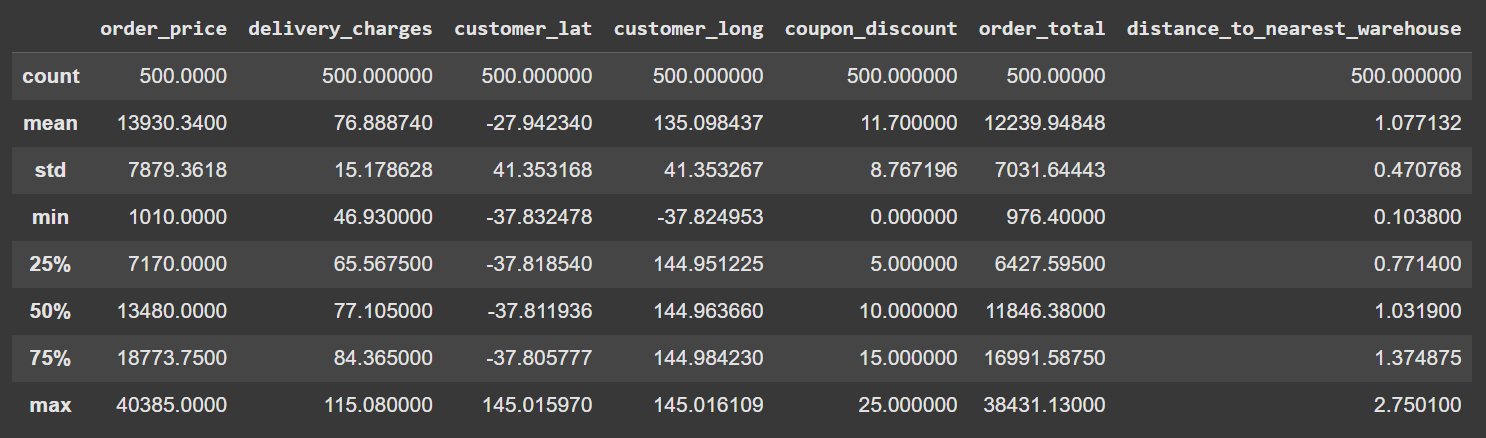

In [1786]:
dirty_data.describe(include=['O'])

,order_id,customer_id,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,499
unique,500,496,3,464,4,499
top,ORD242234,ID0241807393,Thompson,"[('iAssist Line', 1), ('Olivia x460', 2)]",Spring,great product for the kids gaming apps parenta...
freq,1,2,195,5,131,1


Since all the dirty data seems already clean and and there is no significant changes in data statistics (except the latitude and longitude, due to reversed data), then the next step is ready to be executed.

<div class="alert alert-block alert-info">
   
### 3.2. Detecting and Removing Outliers <a class="anchor" name="outlier"></a>

</div>

Load the intended file form the working directory to get the outlier data.

In [ ]:
# Read outlier data csv file from working directory
outlier_data = pd.read_csv(os.path.join(group_008, "digico_outlier_data.csv"))
outlier_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD119194,ID3810929407,2019-01-14,Bakers,"[('pearTV', 2), ('Thunder line', 2), ('Candle ...",17410,79.470,-37.823039,144.991244,0,17489.470,Summer,False,1.4936,works and looks like new great phone works and...,True
1,ORD467179,ID2948774573,2019-11-12,Nickolson,"[('Alcon 10', 2), ('pearTV', 1), ('Thunder lin...",28570,64.670,-37.808531,144.971736,25,21492.170,Spring,False,1.1367,i have way more buffering with this device tha...,False
2,ORD019934,ID0579322421,2019-06-29,Bakers,"[('Lucent 330S', 2), ('Universe Note', 1)]",5910,74.510,-37.814921,144.991405,10,5393.510,Winter,True,0.6432,this cell phone is very good for me for overal...,True
3,ORD465030,ID0591351421,2019-11-30,Nickolson,"[('Candle Inferno', 2), ('Thunder line', 2), (...",13860,39.635,-37.821008,144.956873,15,11820.635,Spring,False,1.1468,awesome best refurbished thing ive ever gotten...,True
4,ORD468273,ID0457365601,2019-02-02,Nickolson,"[('Thunder line', 2), ('Universe Note', 1), ('...",16760,53.380,-37.820717,144.970777,0,16813.380,Summer,False,0.2596,returned returned.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD321671,ID0356478170,2019-05-28,Bakers,"[('Lucent 330S', 2), ('Alcon 10', 1), ('Toshik...",20050,78.645,-37.801954,144.987372,5,19126.145,Autumn,False,1.1311,"front camera came with specs in it, dont have ...",False
496,ORD494134,ID2172718107,2019-10-09,Thompson,"[('Thunder line', 1), ('iAssist Line', 1), ('L...",5635,90.830,-37.809131,144.932082,25,4317.080,Spring,True,1.3757,not unlocked product description says it’s unl...,False
497,ORD129349,ID6167489480,2019-07-26,Nickolson,"[('Candle Inferno', 1), ('Lucent 330S', 2)]",2890,64.950,-37.816990,144.961790,15,2521.450,Winter,False,0.7055,great product fast delivey !! great product fa...,True
498,ORD374972,ID0591431020,2019-12-11,Nickolson,"[('iStream', 1), ('Universe Note', 2)]",7050,68.530,-37.817615,144.967221,10,6413.530,Summer,False,0.2321,great device great great phone. i'm very happy...,True


The first step taken to handle outlier data is checking the data information.

In [1788]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

It can be seen that the date and order_price not in intended data type and need to be converted.

In [1789]:
# Convert 'date' column to datetime
outlier_data['date'] = pd.to_datetime(outlier_data['date'])

# Convert order_price to float64
outlier_data['order_price'] = outlier_data['order_price'].astype('float64')

Then we can see the data description and check the statistical information of the data.

In [1790]:
outlier_data.describe()

,date,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,2019-07-02 17:57:07.200000,13276.500000,76.796040,-37.812239,144.967785,11.17000,11888.861540,1.079448
min,2019-01-01 00:00:00,580.000000,32.350000,-37.832651,144.919638,0.00000,485.190000,0.031900
25%,2019-04-06 18:00:00,7276.250000,65.042500,-37.818761,144.951315,5.00000,6504.377500,0.675175
50%,2019-07-05 12:00:00,12295.000000,76.570000,-37.812689,144.965493,10.00000,10812.005000,1.038200
75%,2019-09-30 06:00:00,18050.000000,87.815000,-37.805800,144.984403,15.00000,16223.190000,1.457500
max,2019-12-31 00:00:00,39880.000000,165.495000,-37.788265,145.018654,25.00000,36504.360000,3.138800
std,NaN,7761.669723,19.121291,0.007577,0.022657,8.55731,7064.777731,0.523352


In [1791]:
outlier_data.describe(include=['O'])

,order_id,customer_id,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500
unique,500,492,3,450,4,500
top,ORD119194,ID0060095861,Thompson,"[('Candle Inferno', 1), ('iStream', 1)]",Autumn,works and looks like new great phone works and...
freq,1,2,198,4,128,1


To identify outliers, a boxplot is used to see the distribution of data for each numerical column. Although in the end, this boxplot cannot be used to overcome multivariate outliers, it can be useful to see univariate outliers. To make the boxplot clearer, each value will be standardized.

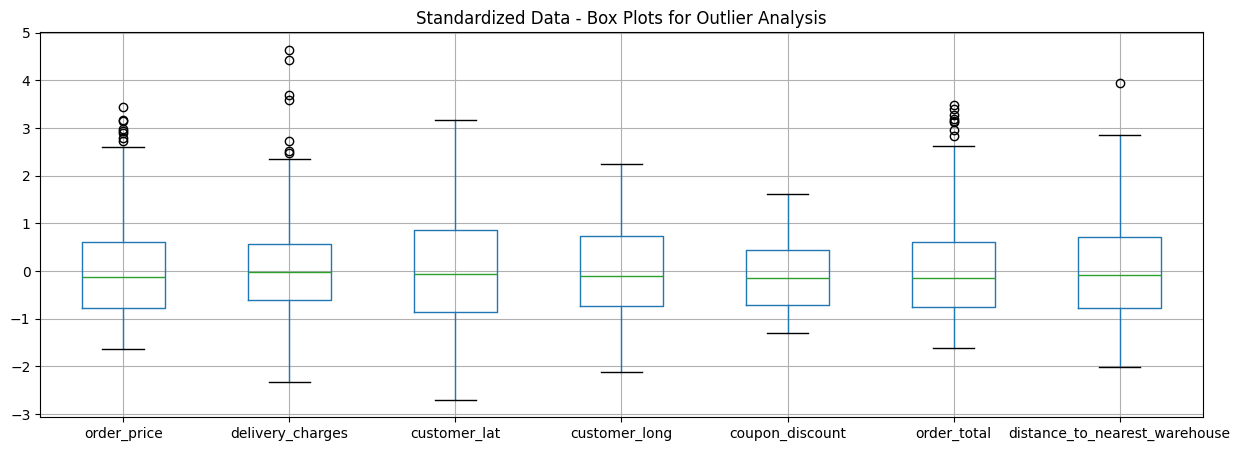

In [1792]:
# Define numeric columns to analyze
numeric_cols = ["order_price", "delivery_charges", "customer_lat", "customer_long", "coupon_discount", "order_total", "distance_to_nearest_warehouse"]

# Standardize the numeric columns
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(outlier_data[numeric_cols]), columns=numeric_cols)

# Create the boxplot to identify the outliers
data_scaled.boxplot(figsize=(15, 5))
plt.title("Standardized Data - Box Plots for Outlier Analysis")
plt.show()

In the boxplot, we can see that order_price, order_total, and distance_to have outliers. Now, let's take a closer look at these outliers.

In [1793]:
def find_outliers_iqr(df):
    # Ensure only numeric columns are selected
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    # Identify outliers (values outside 1.5 * IQR)
    outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
    outlier_rows = df[outliers.any(axis=1)]
    return outlier_rows

print("Outliers in order_price column:\n", find_outliers_iqr(outlier_data[['order_id', 'shopping_cart', 'order_price']]))
print("\nOutliers in order_total column:\n", find_outliers_iqr(outlier_data[['order_id', 'order_total']]))
print("\nOutliers in distance_to_nearest_warehouse column:\n", find_outliers_iqr(outlier_data[['order_id', "distance_to_nearest_warehouse"]]))

Outliers in order_price column:
       order_id                                      shopping_cart  order_price
75   ORD182073  [('Alcon 10', 2), ('Universe Note', 1), ('pear...      34400.0
192  ORD253985  [('iStream', 2), ('pearTV', 2), ('Universe Not...      37720.0
215  ORD278073  [('Toshika 750', 1), ('Alcon 10', 2), ('Candle...      35700.0
219  ORD467324  [('Lucent 330S', 2), ('Alcon 10', 2), ('pearTV...      36430.0
235  ORD124365  [('Alcon 10', 2), ('Toshika 750', 2), ('Thunde...      37800.0
311  ORD005224  [('Thunder line', 2), ('Alcon 10', 2), ('pearT...      34880.0
353  ORD092837  [('pearTV', 2), ('Olivia x460', 1), ('Thunder ...      36105.0
437  ORD011815  [('Lucent 330S', 2), ('Universe Note', 2), ('p...      39880.0

Outliers in order_total column:
       order_id  order_total
75   ORD182073     32763.62
143  ORD272876     31809.91
192  ORD253985     35915.56
219  ORD467324     36504.36
235  ORD124365     34087.41
311  ORD005224     34968.42
353  ORD092837     34338.4

Since the outliers above can still be said to be normal (it is normal to have high order_price and order_total due to the number of purchases, and it is also normal if the buyer is in an area far from the warehouse) and to avoid excessive data deletion, it was decided to retain this data.

Move to outliers in delivery_charges column. The outliers in this column can be considered as multivariate outliers, since it has relationship with more than 1 column, which are season, is_expedited_delivery, distance_to_nearest_warehouse, and is_happy_customer. First, convert categorical variables that related to delivery_charges (season, is_expedited_delivery, and is_happy_customer) into numerical form using one-hot encoding for columns.

In [1794]:
# Encode categorical columns
data_encoded = pd.get_dummies(outlier_data, columns=['season', 'is_expedited_delivery', 'is_happy_customer'], drop_first=True)
data_encoded.describe(include='all')

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,latest_customer_review,season_Spring,season_Summer,season_Winter,is_expedited_delivery_True,is_happy_customer_True
count,500,500,500,500,500,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500,500,500,500,500,500
unique,500,492,NaN,3,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,2,2,2,2,2
top,ORD119194,ID0060095861,NaN,Thompson,"[('Candle Inferno', 1), ('iStream', 1)]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,works and looks like new great phone works and...,False,False,False,True,True
freq,1,2,NaN,198,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,377,378,373,255,373
mean,NaN,NaN,2019-07-02 17:57:07.200000,NaN,NaN,13276.500000,76.796040,-37.812239,144.967785,11.17000,11888.861540,1.079448,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,580.000000,32.350000,-37.832651,144.919638,0.00000,485.190000,0.031900,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2019-04-06 18:00:00,NaN,NaN,7276.250000,65.042500,-37.818761,144.951315,5.00000,6504.377500,0.675175,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2019-07-05 12:00:00,NaN,NaN,12295.000000,76.570000,-37.812689,144.965493,10.00000,10812.005000,1.038200,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2019-09-30 06:00:00,NaN,NaN,18050.000000,87.815000,-37.805800,144.984403,15.00000,16223.190000,1.457500,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,39880.000000,165.495000,-37.788265,145.018654,25.00000,36504.360000,3.138800,NaN,NaN,NaN,NaN,NaN,NaN


In this part, delivery_charges will be treated as the target variable and related columns (such as distance_to_nearest_warehouse, and all the categorical variables that already converted) as features. Then, the data will be splited before fitted into a linear regression model to check the relationship between delivery_charges and other features. After that, residuals can be calcutalted to identify potential multivariate outliers.

In [1795]:
# Select columns relevant to predicting 'delivery_charges'
features = ["distance_to_nearest_warehouse", "is_expedited_delivery_True", "is_happy_customer_True"] + [col for col in data_encoded.columns if col.startswith("season_")]
X = data_encoded[features]
y = data_encoded["delivery_charges"]

# Fit linear regression on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Predict using the entire dataset
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

Identify extreme values in residuals that may indicate multivariate outliers using graphs.

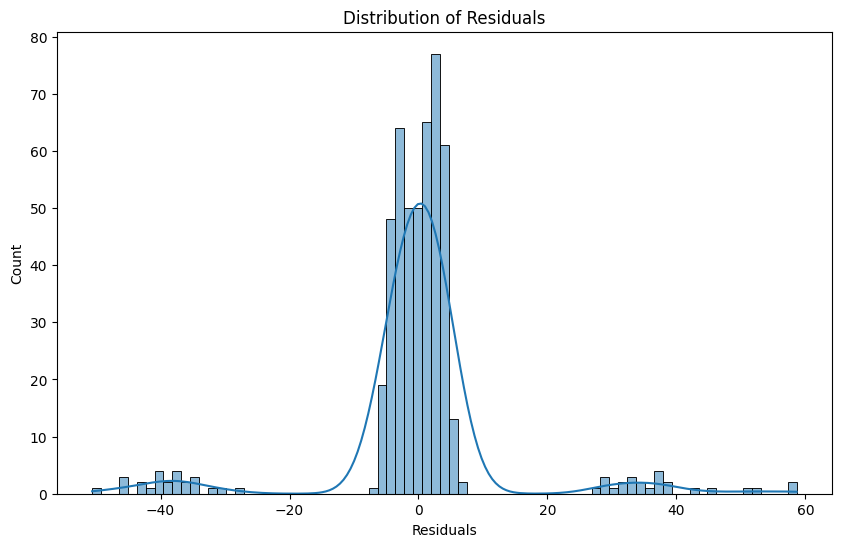

In [1796]:
# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

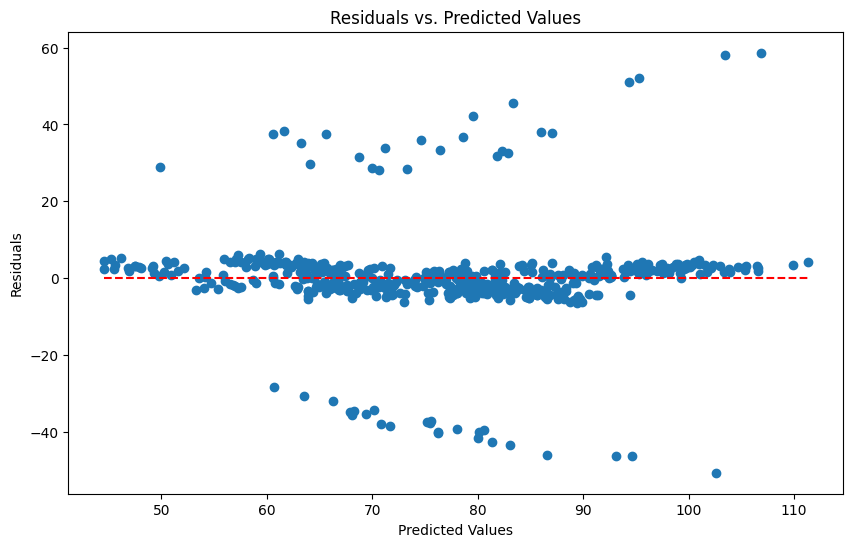

In [1797]:
# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

Define outliers as points with residuals greater than a threshold, such as 2 standard deviations from the mean, because 3σ is too broad and can skew the result of the further the linear regression model.

In [1798]:
# Detect outliers using the chosen threshold (e.g., 3 standard deviations)
residual_std = np.std(residuals)
threshold = 2 * residual_std
outliers = abs(residuals) > threshold

# Identify the indices of outliers
outlier_indices = residuals[outliers].index
print("Outliers detected at indices:", outlier_indices)
print("Total rows to be removed:", len(outlier_indices))

Outliers detected at indices: Index([  3,   9,  33,  37,  40,  47, 105, 115, 117, 120, 141, 148, 155, 166,
       169, 172, 173, 198, 206, 207, 214, 224, 226, 229, 287, 295, 305, 309,
       325, 336, 343, 346, 353, 375, 379, 380, 391, 415, 417, 424, 430, 432,
       438, 447, 453, 458, 465, 490, 492, 495],
      dtype='int64')
Total rows to be removed: 50


Now, remove the rows corresponding to the detected outliers from the outlier_data.

In [1799]:
# Remove outliers
outlier_data = outlier_data.loc[~outlier_data.index.isin(outlier_indices)]

Once all outliers have been removed, the data information check can be repeated.

In [1800]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       450 non-null    object        
 1   customer_id                    450 non-null    object        
 2   date                           450 non-null    datetime64[ns]
 3   nearest_warehouse              450 non-null    object        
 4   shopping_cart                  450 non-null    object        
 5   order_price                    450 non-null    float64       
 6   delivery_charges               450 non-null    float64       
 7   customer_lat                   450 non-null    float64       
 8   customer_long                  450 non-null    float64       
 9   coupon_discount                450 non-null    int64         
 10  order_total                    450 non-null    float64       
 11  season                  

In [1801]:
outlier_data.describe()

,date,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,450,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,2019-07-02 04:25:36.000000256,13209.222222,76.838133,-37.812343,144.967665,11.244444,11807.719800,1.078183
min,2019-01-01 00:00:00,580.000000,47.060000,-37.832651,144.919638,0.000000,485.190000,0.031900
25%,2019-04-07 00:00:00,7180.000000,65.670000,-37.818797,144.951625,5.000000,6462.032500,0.672025
50%,2019-07-05 12:00:00,12192.500000,76.570000,-37.812724,144.965308,10.000000,10804.150000,1.027050
75%,2019-09-28 18:00:00,18022.500000,85.605000,-37.806180,144.984377,15.000000,16109.680000,1.439775
max,2019-12-31 00:00:00,39880.000000,115.490000,-37.788265,145.018654,25.000000,36504.360000,3.138800
std,NaN,7775.726962,14.654393,0.007599,0.022483,8.605834,7039.513679,0.524245


In [1802]:
outlier_data.describe(include='all')

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
count,450,450,450,450,450,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450,450,450.000000,450,450
unique,450,445,NaN,3,410,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN,450,2
top,ORD119194,ID0387152932,NaN,Thompson,"[('Candle Inferno', 1), ('iStream', 1)]",NaN,NaN,NaN,NaN,NaN,NaN,Winter,True,NaN,works and looks like new great phone works and...,True
freq,1,2,NaN,180,4,NaN,NaN,NaN,NaN,NaN,NaN,117,235,NaN,1,333
mean,NaN,NaN,2019-07-02 04:25:36.000000256,NaN,NaN,13209.222222,76.838133,-37.812343,144.967665,11.244444,11807.719800,NaN,NaN,1.078183,NaN,NaN
min,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,580.000000,47.060000,-37.832651,144.919638,0.000000,485.190000,NaN,NaN,0.031900,NaN,NaN
25%,NaN,NaN,2019-04-07 00:00:00,NaN,NaN,7180.000000,65.670000,-37.818797,144.951625,5.000000,6462.032500,NaN,NaN,0.672025,NaN,NaN
50%,NaN,NaN,2019-07-05 12:00:00,NaN,NaN,12192.500000,76.570000,-37.812724,144.965308,10.000000,10804.150000,NaN,NaN,1.027050,NaN,NaN
75%,NaN,NaN,2019-09-28 18:00:00,NaN,NaN,18022.500000,85.605000,-37.806180,144.984377,15.000000,16109.680000,NaN,NaN,1.439775,NaN,NaN
max,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,39880.000000,115.490000,-37.788265,145.018654,25.000000,36504.360000,NaN,NaN,3.138800,NaN,NaN


Since all the outlier data seems already clean and outlier-free, then the next step is ready to be executed

<div class="alert alert-block alert-info">
   
### 3.3. Imputing Missing Values <a class="anchor" name="missing"></a>

</div>

Load the intended file form the working directory to get the missing data.

In [ ]:
# Read missing data csv file from working directory
missing_data = pd.read_csv(os.path.join(group_008, "digico_missing_data.csv"))
missing_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD280911,ID0667224586,2019-07-24,Thompson,"[('Lucent 330S', 2), ('Thunder line', 1), ('iS...",4790.0,NaN,-37.813909,144.955103,0,4865.48,Winter,True,0.7198,unbeatable value ! absolutely love the phone ....,1.0
1,ORD276867,ID0247018769,2019-02-26,Nickolson,"[('Thunder line', 1), ('Candle Inferno', 1)]",2610.0,78.94,-37.811245,144.968668,10,2427.94,Summer,True,0.8218,recieved mine with bad sim reader & broken sim...,0.0
2,ORD199743,ID2171141870,2019-11-09,Bakers,"[('Universe Note', 2), ('iStream', 1), ('Thund...",10460.0,89.91,-37.825324,145.012410,5,10026.91,Spring,False,2.2788,love it! love this phone! replaced my alcon 4s...,1.0
3,ORD077837,ID0331164328,2019-01-28,Nickolson,"[('Olivia x460', 1), ('iStream', 2), ('Thunder...",10015.0,89.67,-37.799879,144.968710,5,9603.92,Summer,True,2.0847,purchased for my kids but it was hard to navig...,0.0
4,ORD487209,ID4157116184,2019-10-26,Bakers,"[('iStream', 2), ('iAssist Line', 1), ('Alcon ...",13925.0,77.25,-37.818264,144.996382,15,11913.50,Spring,False,0.9259,currently setting everything up on it but so f...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD001182,ID0597911555,2019-12-13,Nickolson,"[('Candle Inferno', 2), ('pearTV', 2), ('iStre...",13630.0,90.10,-37.815666,144.965465,10,12357.10,Summer,True,0.4852,it's a 16 gb mini-computer and camera perfect ...,1.0
496,ORD213584,ID0576879081,2019-12-16,NaN,"[('pearTV', 1), ('iAssist Line', 2), ('Olivia ...",31110.0,74.14,-37.819460,144.979276,10,28073.14,Summer,False,0.8606,good deal for non-alcon user good deal for non...,1.0
497,ORD115794,ID0370749268,2019-11-22,Bakers,"[('Toshika 750', 2), ('pearTV', 2)]",21260.0,102.95,-37.812725,144.983262,10,19236.95,Spring,True,1.0957,five stars best phone ever,1.0
498,ORD229766,ID0592800893,2019-02-24,NaN,"[('Thunder line', 1), ('Alcon 10', 2), ('iStre...",20230.0,69.10,-37.816386,144.968639,5,19287.60,Summer,False,0.2587,works perfectly !! i purchased this phone refu...,1.0


The first step taken to handle missing data is checking the data information.

In [1804]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [1805]:
print(missing_data.isnull().sum())

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64


From the data information, it is known that the date and is_happy_customer (due to the missing values) not in proper datetime, and there are missing values in nearest_warehouse, order_price, delivery_charges, order_total, distance_to_nearest_warehouse, and is_happy_customer columns. These columns need to be filled with appropriate inputs.

In [1806]:
missing_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,13653.525773,77.879109,-37.812255,144.967177,10.940000,12237.826639,1.082691,0.760870
std,7927.575242,14.205648,0.008310,0.021637,8.206772,7149.137621,0.699823,0.427017
min,730.000000,46.860000,-37.827523,144.846336,0.000000,728.750000,0.057000,0.000000
25%,7535.000000,66.600000,-37.818423,144.953033,5.000000,6592.710000,0.719300,1.000000
50%,11990.000000,77.500000,-37.812909,144.963749,10.000000,10696.950000,1.029900,1.000000
75%,19060.000000,84.925000,-37.805824,144.981494,15.000000,17036.810000,1.371900,1.000000
max,41870.000000,170.400000,-37.739636,145.017015,25.000000,35991.810000,12.027300,1.000000


In [1807]:
missing_data.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,445,500,500,500
unique,500,496,269,3,465,4,500
top,ORD280911,ID3721159057,2019-11-24,Thompson,"[('Toshika 750', 2), ('pearTV', 2)]",Autumn,unbeatable value ! absolutely love the phone ....
freq,1,2,6,180,4,138,1


First of all, lets change the date data type into datetime.

In [1808]:
# Convert 'date' column to datetime
missing_data['date'] = pd.to_datetime(missing_data['date'])

The first column that has missing values ​​to be handled is the order_price column, because it has the fewest missing values ​​and is easy to handle by referring only to the shopping_cart column.

In [1809]:
md_order_price = missing_data[missing_data['order_price'].isnull()]
md_order_price.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
25,ORD294002,ID0781082017,2019-03-31,Bakers,"[('Candle Inferno', 2), ('Lucent 330S', 1)]",NaN,69.65,-37.826960,145.013055,0,NaN,Autumn,True,2.4540,not best purchase this phone got tons of scree...,0.0
37,ORD318891,ID0250933641,2019-01-30,Bakers,"[('Thunder line', 2), ('iAssist Line', 1)]",NaN,102.67,-37.824092,145.002853,0,NaN,Summer,True,1.7063,just like new everything was as if new. perfect!,1.0
38,ORD013156,ID0207085315,2019-03-19,Bakers,"[('Alcon 10', 2), ('Thunder line', 1), ('Unive...",NaN,71.51,-37.815147,145.014303,15,NaN,Autumn,False,1.7725,"replacement phone. good flip phone, rugged.",1.0
56,ORD082615,ID0633913026,2019-07-04,Thompson,"[('Olivia x460', 2), ('Universe Note', 2), ('T...",NaN,64.32,-37.815784,144.955511,25,NaN,Winter,False,0.8192,i love it. the best i have ever owned,1.0
61,ORD039569,ID0302571350,2019-05-30,Bakers,"[('Candle Inferno', 1), ('Lucent 330S', 2)]",NaN,67.95,-37.802377,144.979500,5,NaN,Autumn,False,1.6229,ll good,1.0


To find out the price of each branded item in the shopping_cart, the python numpy.linalg package is used. Then after the price of each item is found, imputation is done according to the calculation of the item price multiplied by the number of items in the shopping_cart.

In [1810]:
# Extract rows with no missing order_price
non_missing_orders = missing_data.dropna(subset=['order_price'])

# Create list of unique items across all shopping carts
unique_items = list(set([item for cart in non_missing_orders['shopping_cart'] for item, _ in eval(cart)]))

# Build matrix (quantities) and vector (order_price)
quantities_matrix = []
order_prices = []

for index, row in non_missing_orders.iterrows():
    quantities = [0] * len(unique_items)
    for item, qty in eval(row['shopping_cart']):
        item_index = unique_items.index(item)
        quantities[item_index] = qty
    quantities_matrix.append(quantities)
    order_prices.append(row['order_price'])

# Convert to numpy arrays for least squares calculation
quantities_matrix = np.array(quantities_matrix)
order_prices = np.array(order_prices)

# Use np.linalg.lstsq to solve for unit prices
unit_prices, residuals, rank, s = np.linalg.lstsq(quantities_matrix, order_prices, rcond=None)
item_price_map = dict(zip(unique_items, unit_prices))

# Use calculated unit prices to fill remaining missing order_price values
for index, row in missing_data[missing_data['order_price'].isna()].iterrows():
    calculated_price = sum(item_price_map[item] * qty for item, qty in eval(row['shopping_cart']))
    missing_data.at[index, 'order_price'] = calculated_price


In [1811]:
missing_data[missing_data['order_id'].isin(md_order_price['order_id'].unique())].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
25,ORD294002,ID0781082017,2019-03-31,Bakers,"[('Candle Inferno', 2), ('Lucent 330S', 1)]",2090.0,69.65,-37.826960,145.013055,0,NaN,Autumn,True,2.4540,not best purchase this phone got tons of scree...,0.0
37,ORD318891,ID0250933641,2019-01-30,Bakers,"[('Thunder line', 2), ('iAssist Line', 1)]",6585.0,102.67,-37.824092,145.002853,0,NaN,Summer,True,1.7063,just like new everything was as if new. perfect!,1.0
38,ORD013156,ID0207085315,2019-03-19,Bakers,"[('Alcon 10', 2), ('Thunder line', 1), ('Unive...",23530.0,71.51,-37.815147,145.014303,15,NaN,Autumn,False,1.7725,"replacement phone. good flip phone, rugged.",1.0
56,ORD082615,ID0633913026,2019-07-04,Thompson,"[('Olivia x460', 2), ('Universe Note', 2), ('T...",13670.0,64.32,-37.815784,144.955511,25,NaN,Winter,False,0.8192,i love it. the best i have ever owned,1.0
61,ORD039569,ID0302571350,2019-05-30,Bakers,"[('Candle Inferno', 1), ('Lucent 330S', 2)]",2890.0,67.95,-37.802377,144.979500,5,NaN,Autumn,False,1.6229,ll good,1.0


Next is the column regarding the warehouse, which includes the nearest_warehouse and distance_to_nearest_warehouse columns. From the checking information, it is known that there are a total of 55 missing values ​​in nearest_warehouse, of which 31 are also missing values ​​in distance_to_nearest_warehouse.

In [1812]:
(missing_data[missing_data['nearest_warehouse'].isnull() | missing_data['distance_to_nearest_warehouse'].isnull()]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 7 to 498
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       55 non-null     object        
 1   customer_id                    55 non-null     object        
 2   date                           55 non-null     datetime64[ns]
 3   nearest_warehouse              0 non-null      object        
 4   shopping_cart                  55 non-null     object        
 5   order_price                    55 non-null     float64       
 6   delivery_charges               55 non-null     float64       
 7   customer_lat                   55 non-null     float64       
 8   customer_long                  55 non-null     float64       
 9   coupon_discount                55 non-null     int64         
 10  order_total                    55 non-null     float64       
 11  season                   

In the previous section on handling dirty data, the find_nearest_warehouse function has been created, this function is created to replace the warehouse that is not nearet from the customer and update its distance. This function can then be applied to fill in the missing data for these two columns.

In [1813]:
# Apply the function to the missing data
missing_data = update_nearest_and_distance(missing_data)

Total 'nearest_warehouse' updates: 55
Total 'distance_to_nearest_warehouse' updates: 31


Next, like warehouse columns, the update_happy_customer function has been created using SentimentIntensityAnalyzer in handling dirty data part. The difference is that this function requires a copy of is_happy_customer column so as not to interfere with the original column.

In [1814]:
# Create a copy of is_happy_customer column
missing_data['is_happy_customer2'] = missing_data['is_happy_customer']

# Apply the function to the missing data
missing_data = missing_data.apply(update_happy_customer, axis=1)

After applying the update_happy_customer function, a check is made on the difference between the is_happy_customer and is_happy_customer2 columns.

In [1815]:
print((missing_data[missing_data['is_happy_customer'] != missing_data['is_happy_customer2']]).isna().sum())

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                40
is_happy_customer2                0
dtype: int64


In this case, it was found that the difference occurred due to missing values. Therefore, it was decided to delete the column that had missing values ​​and replace it with a column from the update_happy_customer function.

In [1816]:
# Drop the 'is_happy_customer' column
missing_data = missing_data.drop('is_happy_customer', axis=1)

# Rename 'is_happy_customer2' to 'is_happy_customer'
missing_data = missing_data.rename(columns={'is_happy_customer2': 'is_happy_customer'})

Once the missing values ​​in the distance_to_nearest_warehouse and is_happy_customer columns are filled in, the problem in delivery_charges can begin to be worked on.

In [1817]:
md_delivery_charges = missing_data[missing_data['delivery_charges'].isnull()]
md_delivery_charges.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD280911,ID0667224586,2019-07-24,Thompson,"[('Lucent 330S', 2), ('Thunder line', 1), ('iS...",4790.0,NaN,-37.813909,144.955103,0,4865.48,Winter,True,0.7198,unbeatable value ! absolutely love the phone ....,True
13,ORD215566,ID2384091392,2019-02-12,Nickolson,"[('iStream', 1), ('Toshika 750', 2), ('Lucent ...",11250.0,NaN,-37.817743,144.966060,5,10775.77,Summer,True,0.3213,good phone a bit over priced considering the y...,True
44,ORD148290,ID3555788038,2019-10-14,Thompson,"[('Thunder line', 1), ('Universe Note', 1)]",5630.0,NaN,-37.807423,144.940246,0,5707.68,Spring,False,0.8377,"nice screen, got it at discounted price for my...",True
53,ORD048762,ID5402876178,2019-05-27,Nickolson,"[('Universe Note', 2), ('Thunder line', 2), ('...",29160.0,NaN,-37.820477,144.977116,0,29240.09,Autumn,True,0.6975,this is a great tablet for the price. my kid l...,True
59,ORD099536,ID0547568785,2019-08-21,Bakers,"[('iStream', 2), ('Olivia x460', 1)]",1525.0,NaN,-37.812747,144.988401,25,1192.40,Winter,False,0.6742,don't waste your time or money overheated cons...,False


In handling missing values ​​in the delivery_charges column, other columns are needed, such as season, is_expedited_delivery, distance_to_nearest_warehouse, and is_happy_customer, to create a liner model to predict delivery_charges. The dataset used for build this model is outlier_data that already free from outlier.

In [1818]:
# Dictionary to store trained models for each season
season_models = {}

clean_data = outlier_data

# Train models on dirty_data by season
for season in clean_data['season'].unique():
    # Filter dirty_data for the current season
    train_data = clean_data[clean_data['season'] == season]

    # Define features and target variable
    X = train_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer']]
    y = train_data['delivery_charges']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Season: {season}, R2 Score: {r2:.2f}')

    # Store the trained model for this season
    season_models[season] = model


Season: Summer, R2 Score: 0.99
Season: Spring, R2 Score: 0.99
Season: Winter, R2 Score: 0.99
Season: Autumn, R2 Score: 0.98


Then apply the model into the missing_data to input the delivery_charges.

In [1819]:
# Use trained models to predict missing delivery_charges in missing_data
for season, model in season_models.items():
    # Filter missing_data for the current season and rows with missing delivery_charges
    season_missing = missing_data[(missing_data['season'] == season) & (missing_data['delivery_charges'].isna())]

    if not season_missing.empty:
        # Prepare features for prediction
        X_missing = season_missing[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer']]

        # Predict and round the delivery charges
        missing_data.loc[season_missing.index, 'delivery_charges'] = model.predict(X_missing).round(2)

In [1820]:
missing_data[missing_data['order_id'].isin(md_delivery_charges['order_id'].unique())].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD280911,ID0667224586,2019-07-24,Thompson,"[('Lucent 330S', 2), ('Thunder line', 1), ('iS...",4790.0,76.52,-37.813909,144.955103,0,4865.48,Winter,True,0.7198,unbeatable value ! absolutely love the phone ....,True
13,ORD215566,ID2384091392,2019-02-12,Nickolson,"[('iStream', 1), ('Toshika 750', 2), ('Lucent ...",11250.0,88.20,-37.817743,144.966060,5,10775.77,Summer,True,0.3213,good phone a bit over priced considering the y...,True
44,ORD148290,ID3555788038,2019-10-14,Thompson,"[('Thunder line', 1), ('Universe Note', 1)]",5630.0,76.89,-37.807423,144.940246,0,5707.68,Spring,False,0.8377,"nice screen, got it at discounted price for my...",True
53,ORD048762,ID5402876178,2019-05-27,Nickolson,"[('Universe Note', 2), ('Thunder line', 2), ('...",29160.0,78.15,-37.820477,144.977116,0,29240.09,Autumn,True,0.6975,this is a great tablet for the price. my kid l...,True
59,ORD099536,ID0547568785,2019-08-21,Bakers,"[('iStream', 2), ('Olivia x460', 1)]",1525.0,49.13,-37.812747,144.988401,25,1192.40,Winter,False,0.6742,don't waste your time or money overheated cons...,False


Finally, moving on to order_total, once all the required data such as order_price, coupon_discount, and delivery_charges are complete, the empty order_total can be filled with the calculations provided.

In [1821]:
md_order_total = missing_data[missing_data['order_total'].isnull()]
md_order_total.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
25,ORD294002,ID0781082017,2019-03-31,Bakers,"[('Candle Inferno', 2), ('Lucent 330S', 1)]",2090.0,69.65,-37.826960,145.013055,0,NaN,Autumn,True,2.4540,not best purchase this phone got tons of scree...,False
37,ORD318891,ID0250933641,2019-01-30,Bakers,"[('Thunder line', 2), ('iAssist Line', 1)]",6585.0,102.67,-37.824092,145.002853,0,NaN,Summer,True,1.7063,just like new everything was as if new. perfect!,True
38,ORD013156,ID0207085315,2019-03-19,Bakers,"[('Alcon 10', 2), ('Thunder line', 1), ('Unive...",23530.0,71.51,-37.815147,145.014303,15,NaN,Autumn,False,1.7725,"replacement phone. good flip phone, rugged.",True
56,ORD082615,ID0633913026,2019-07-04,Thompson,"[('Olivia x460', 2), ('Universe Note', 2), ('T...",13670.0,64.32,-37.815784,144.955511,25,NaN,Winter,False,0.8192,i love it. the best i have ever owned,True
61,ORD039569,ID0302571350,2019-05-30,Bakers,"[('Candle Inferno', 1), ('Lucent 330S', 2)]",2890.0,67.95,-37.802377,144.979500,5,NaN,Autumn,False,1.6229,ll good,True


In [1822]:
missing_data['order_total'].fillna((missing_data['order_price'] * (1 - missing_data['coupon_discount'] / 100) + missing_data['delivery_charges']), inplace=True)

<ipython-input-1822-dacbcc0a6de2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_data['order_total'].fillna((missing_data['order_price'] * (1 - missing_data['coupon_discount'] / 100) + missing_data['delivery_charges']), inplace=True)


In [1823]:
missing_data[missing_data['order_id'].isin(md_order_total['order_id'].unique())].head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
25,ORD294002,ID0781082017,2019-03-31,Bakers,"[('Candle Inferno', 2), ('Lucent 330S', 1)]",2090.0,69.65,-37.826960,145.013055,0,2159.65,Autumn,True,2.4540,not best purchase this phone got tons of scree...,False
37,ORD318891,ID0250933641,2019-01-30,Bakers,"[('Thunder line', 2), ('iAssist Line', 1)]",6585.0,102.67,-37.824092,145.002853,0,6687.67,Summer,True,1.7063,just like new everything was as if new. perfect!,True
38,ORD013156,ID0207085315,2019-03-19,Bakers,"[('Alcon 10', 2), ('Thunder line', 1), ('Unive...",23530.0,71.51,-37.815147,145.014303,15,20072.01,Autumn,False,1.7725,"replacement phone. good flip phone, rugged.",True
56,ORD082615,ID0633913026,2019-07-04,Thompson,"[('Olivia x460', 2), ('Universe Note', 2), ('T...",13670.0,64.32,-37.815784,144.955511,25,10316.82,Winter,False,0.8192,i love it. the best i have ever owned,True
61,ORD039569,ID0302571350,2019-05-30,Bakers,"[('Candle Inferno', 1), ('Lucent 330S', 2)]",2890.0,67.95,-37.802377,144.979500,5,2813.45,Autumn,False,1.6229,ll good,True


When all missing data has been inputted, rechecking of data information can be done.

In [1824]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    float64       
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [1825]:
missing_data.describe()

,date,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2019-07-01 12:11:31.200000,13599.310000,77.941560,-37.812255,144.967177,10.940000,12187.072600,1.090150
min,2019-01-01 00:00:00,730.000000,46.860000,-37.827523,144.846336,0.000000,728.750000,0.057000
25%,2019-03-29 00:00:00,7281.250000,66.852500,-37.818423,144.953033,5.000000,6551.907500,0.714625
50%,2019-06-25 12:00:00,11760.000000,77.775000,-37.812909,144.963749,10.000000,10695.350000,1.032950
75%,2019-10-09 06:00:00,18973.750000,85.310000,-37.805824,144.981494,15.000000,17009.877500,1.383450
max,2019-12-30 00:00:00,41870.000000,170.400000,-37.739636,145.017015,25.000000,35991.810000,12.027300
std,NaN,7955.791489,14.148636,0.008310,0.021637,8.206772,7170.960676,0.692507


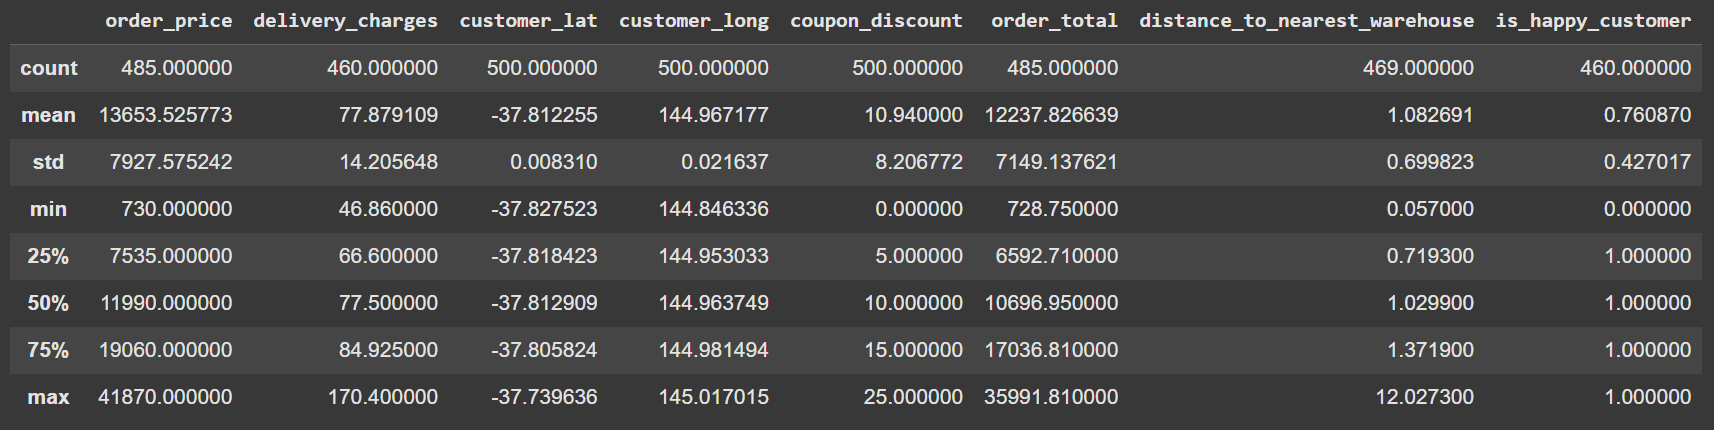

In [1826]:
missing_data.describe(include=['O'])

,order_id,customer_id,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500
unique,500,496,3,465,4,500
top,ORD280911,ID3721159057,Thompson,"[('Toshika 750', 2), ('pearTV', 2)]",Autumn,unbeatable value ! absolutely love the phone ....
freq,1,2,204,4,138,1


Since there is no significant changes in data statistics after missing data inputation, the next step is ready to be executed.

<div class="alert alert-block alert-warning">

## 4.  Writing Output Files  <a class="anchor" name="write"></a>

</div>

After all the data cleansing processes are done, save the clean data into csv files inside the working directory with required file name.

<div class="alert alert-block alert-info">
   
### 4.1. Dirty Data Solution csv <a class="anchor" name="write-dirty"></a>

</div>

In [1827]:
dirty_data.to_csv(os.path.join(group_008, "Group008_dirty_data_solution.csv"), index=False)

<div class="alert alert-block alert-info">
   
### 4.2. Outlier Data Solution csv <a class="anchor" name="write-outlier"></a>

</div>

In [1828]:
outlier_data.to_csv(os.path.join(group_008, "Group008_outlier_data_solution.csv"), index=False)

<div class="alert alert-block alert-info">
   
### 4.3. Missing Data Solution csv <a class="anchor" name="write-missing"></a>

</div>

In [1829]:
missing_data.to_csv(os.path.join(group_008, "Group008_missing_data_solution.csv"), index=False)

<div class="alert alert-block alert-warning">

## 5.  Summary  <a class="anchor" name="summary"></a>

</div>

Task 1 was successfully completed through a series of data preprocessing techniques, including error detection and correction, statistical imputation, and outlier removal. Linear regression models were employed to estimate missing delivery charges, accounting for seasonal dependencies. Additionally, various imputation strategies ensured the data was complete and accurate, while outlier detection methods ensured the removal of anomalous values without discarding legitimate, high-value records.

The final dataset is now cleansed, free from errors and outliers, and ready for further analysis. This project illustrates the importance of thorough data wrangling in creating a reliable dataset, highlighting methods that maintain data quality while preparing for accurate future analysis.

<div class="alert alert-block alert-warning">

## 6.  References  <a class="anchor" name="Ref"></a>

</div>

1. Season in Australia, *Bureau of Meteorology*, http://www.bom.gov.au/climate/glossary/seasons.shtml, Accessed 28/11/2024.
2. Match Season and Date in Dirty Data, *ChatGPT*, https://chatgpt.com, Accessed 28/10/2024.
3. Recalculated Distance from Nearest Warehouse, *Stack Overflow*, https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points, Accessed 31/10/2024.
4. Finding Unit Price, *NumPy Documentation*, https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve, Accessed 4/11/2024.
5. Do Linear Regression Residuals to Remove Multivariate Outliers, *ChatGPT*, https://chatgpt.com, Accessed 8/11/2024.
6. Refill and Input the is_happy_customer, *NLTK Documentation*, https://www.nltk.org/api/nltk.sentiment.vader.html, Accessed 9/11/2024.
